In [1]:
import uproot
import pandas as pd
import numpy as np
import boost_histogram as bh
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
folder = '/eos/atlas/atlascerngroupdisk/perf-egamma/InclusivePhotons'
branches = ['evtWeight', 'y_passOQ', 'y_pt', 'y_eta', 'y_isTruthMatchedPhoton', 'y_Rhad1', 'y_Rhad', 'y_Reta', 'y_weta2', 'y_Rphi', 'y_wtots1', 'y_weta1', 'y_fracs1', 'y_deltae', 'y_Eratio', 'y_f1']

In [3]:
#Loading in Files
gamjetfile = uproot.open(folder+'/mc21_gammajet_v02/PyPt17_mc21_800664.root')#, entrystop=1000)
jetjetfile = uproot.open(folder+'/mc21_jetjet_v02/Py8_jetjet_mc21_801279_p5057_Rel22_AB22.2.50_v02.root')#, entrystop=1000)

gamjetSP = gamjetfile['SinglePhoton']
jetjetSP = jetjetfile['SinglePhoton']

df_gj = gamjetSP.arrays(branches,library='pd')
df_jj = jetjetSP.arrays(branches,library='pd')

In [4]:
# Histogram Style (ATLAS)
import matplotlib.pyplot as plt
plt.style.use('/eos/user/k/kyklazek/ATLAS.mplstyle') 

import matplotlib.font_manager as font_manager
font_dirs = ['/eos/user/k/kyklazek/helvetica_font/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    try:
        font_manager.fontManager.addfont(font_file)
        print ("added",font_file)
    except:
        print("cannot add",font_file)
#font_manager.fontManager.ttflist.extend(font_list)

added /eos/user/k/kyklazek/helvetica_font/HelveticaBold.ttf
added /eos/user/k/kyklazek/helvetica_font/Helvetica.ttf
added /eos/user/k/kyklazek/helvetica_font/HelveticaOblique.ttf
cannot add /eos/user/k/kyklazek/helvetica_font/Helvetica_4.ttf
added /eos/user/k/kyklazek/helvetica_font/HelveticaBoldOblique.ttf
added /eos/user/k/kyklazek/helvetica_font/HelveticaLightOblique.ttf
added /eos/user/k/kyklazek/helvetica_font/Helvetica_1.ttf
added /eos/user/k/kyklazek/helvetica_font/HelveticaLight.ttf
added /eos/user/k/kyklazek/helvetica_font/Helvetica_2.ttf
added /eos/user/k/kyklazek/helvetica_font/Helvetica_3.ttf
added /eos/user/k/kyklazek/helvetica_font/Helvetica_0.ttf


In [91]:
def ATLAShist(hist1,hist2,label='variable name',minmax=[-2,2],figname=False,log=True,norm=True,save=False):
    '''
    right now, hist1 is for single photons (gj), hist2 is for fakes (jj)  - boosthistograms
    
    minmax is for x axis: minmax=[minx,maxx]   -  list or tuple
    
    label is variable name. ex.: label=r"$R_{had1}$"
    '''
    
    integral1 = hist1.sum().value
    integral2 = hist2.sum().value
    minn = minmax[0]
    maxx = minmax[1]
    
    plt.close('all')
    plt.figure(figsize=(9,6))
    
    # draw errobars, use the sqrt error. You can use what you want there
    # poissonian 1 sigma intervals would make more sense
    if norm==True:
        plt.errorbar(hist1.axes[0].centers, hist1.view().value/integral1, yerr=np.sqrt(hist1.view().variance)/integral1,
                 fmt='^',mec='purple',mfc='purple',ecolor='purple',ms=7,label=r'single $\gamma$')
        plt.errorbar(hist2.axes[0].centers, hist2.view().value/integral2, yerr=np.sqrt(hist2.view().variance)/integral2,
                 fmt='ro',mec='skyblue',mfc='skyblue',ecolor='skyblue',ms=7,label=r'fake photons')
    elif norm==False:
        plt.errorbar(hist1.axes[0].centers, hist1.view().value, yerr=np.sqrt(hist1.view().variance),
                 fmt='^',mec='purple',mfc='purple',ecolor='purple',ms=7,label=r'single $\gamma$')
        plt.errorbar(hist2.axes[0].centers, hist2.view().value, yerr=np.sqrt(hist2.view().variance),
                 fmt='ro',mec='skyblue',mfc='skyblue',ecolor='skyblue',ms=7,label=r'fake photons')
    else:
        print('Please choose True or False for input norm')
        return


    ax = plt.gca()
    ax.set_xlabel(label,position=(1,1),horizontalalignment='right')
    if norm==True:
        ax.set_ylabel("Fraction of Events",position=(0,1),horizontalalignment='right')
    elif norm==False:
        ax.set_ylabel("Number of Events",position=(0,1),horizontalalignment='right')
    ax.legend()
    if log==True:
        plt.yscale('log')
    
    if log==True:
        if norm==True:
            top = 20*max(max(hist1.view().value/integral1),max(hist2.view().value/integral2))
            bottom = 0.000001;
        elif norm==False:
            top = 25*max(max(hist1.view().value),max(hist2.view().value))
            bottom = 0.1;
        left = minn; right = maxx
        ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)
    elif log==False:
        if norm==True:
            top = 1.1*max(hist1.view().value/integral1)
            bottom = 0;
        elif norm==False:
            top = 1.8*max(max(hist1.view().value),max(hist2.view().value))
            bottom = 0;
        left = minn; right = maxx
        ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)
    else:
        print('Please choose True or False for input log')
        return

    if log==True:
        ax.text((right-left)*0.02+left, (top-bottom)*0.3+bottom, 'ATLAS',style = 'italic',fontweight='bold',fontsize=20,horizontalalignment='left')
        ax.text((right-left)*0.165+left, (top-bottom)*0.3+bottom, 'Simulation Internal',fontsize=20,horizontalalignment='left')
        ax.text((right-left)*0.02+left, (top-bottom)*0.10+bottom, r'$\sqrt{s} =$'+'13.6 TeV, xx fb'+r'$^{-1}$',fontsize=20,horizontalalignment='left')
    elif log==False:
        print('have not figured out ATLAS Label for non-log yet')
        
    if bool(figname)==True:
        plt.savefig(figname+'.pdf',format='pdf')
    plt.show()
    
    
        
    return

In [79]:
ATLAShist?



In [30]:
def makebh(branchname,minmax,bins=100):
    '''makes bh historgrams
    
    with ***data frame variable names df_gj and df_jj***
    
    minmax = (minx,maxx)
    
    returns gamma-jet histogram and jet-jet histogram, in that order'''
    
    
    minn = minmax[0]
    maxx = minmax[1]
    
    histgj = bh.Histogram(bh.axis.Regular(bins,minn,maxx),storage=bh.storage.Weight()) 
    exec('histgj.fill(df_gj.'+branchname+', weight=df_gj.evtWeight)')

    histjj = bh.Histogram(bh.axis.Regular(bins,minn,maxx),storage=bh.storage.Weight()) 
    exec('histjj.fill(df_jj.'+branchname+', weight=df_jj.evtWeight)')
    
    return histgj, histjj

In [31]:
makebh?

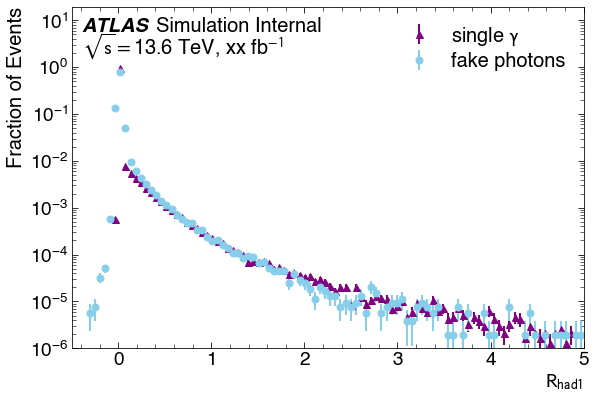

In [92]:
branchname = 'y_Rhad1'
label = r'$R_{had1}$'
minmax = (-.5,5)
hist1,hist2 = makebh(branchname,minmax)
ATLAShist(hist1,hist2,label,minmax,branchname)

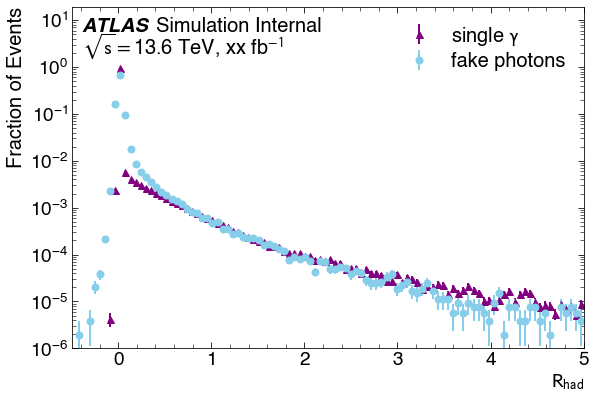

In [93]:
branchname = 'y_Rhad'
label = r'$R_{had}$'
minmax = (-.5,5)
hist1,hist2 = makebh(branchname,minmax)
ATLAShist(hist1,hist2,label,minmax,branchname)

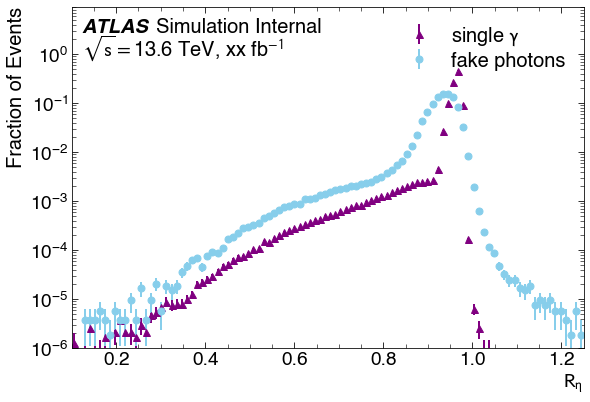

In [94]:
branchname = 'y_Reta'
label = r'$R_{\eta}$'
minmax = (0.1,1.25)
hist1,hist2 = makebh(branchname,minmax)
ATLAShist(hist1,hist2,label,minmax,branchname)

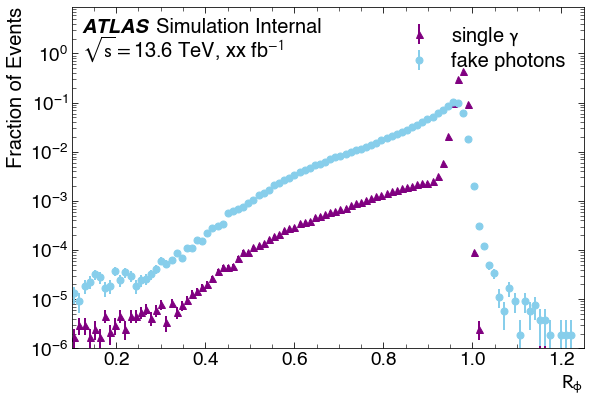

In [95]:
branchname = 'y_Rphi'
label = r'$R_{\phi}$'
minmax = (0.1,1.25)
hist1,hist2 = makebh(branchname,minmax)
ATLAShist(hist1,hist2,label,minmax,branchname)

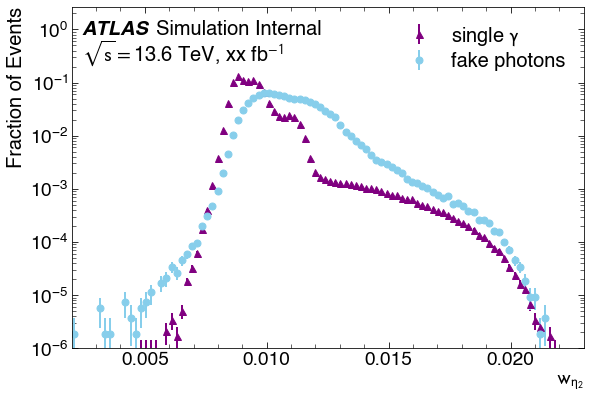

In [96]:
branchname = 'y_weta2'
label = r'$w_{\eta_2}$'
minmax = (0.002,0.023)
hist1,hist2 = makebh(branchname,minmax)
ATLAShist(hist1,hist2,label,minmax,branchname)

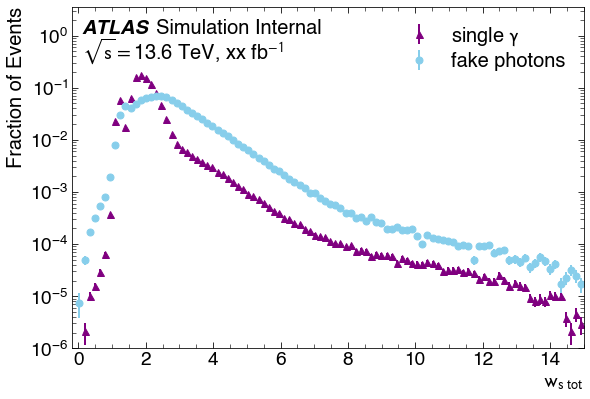

In [97]:
branchname = 'y_wtots1'
label = r'$w_{s \hspace{.4} tot}$'
minmax = (-.2,15)
hist1,hist2 = makebh(branchname,minmax)
ATLAShist(hist1,hist2,label,minmax,branchname)

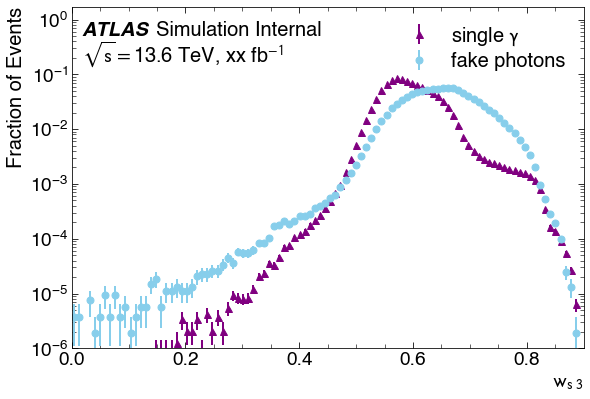

In [98]:
branchname = 'y_weta1'
label = r'$w_{s \hspace{.4}3}$'
minmax = (0,.9)
hist1,hist2 = makebh(branchname,minmax)
ATLAShist(hist1,hist2,label,minmax,branchname)

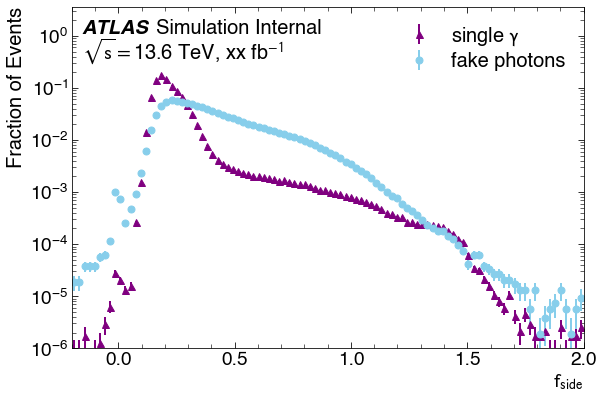

In [99]:
branchname = 'y_fracs1'
label = r'$f_{side}$'
minmax = (-.2,2)
hist1,hist2 = makebh(branchname,minmax)
ATLAShist(hist1,hist2,label,minmax,branchname)

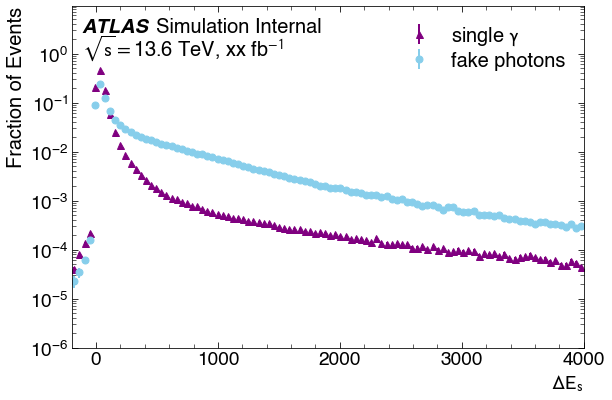

In [100]:
branchname = 'y_deltae'
label = r'$\Delta E_s$'
minmax = (-200,4000)
hist1,hist2 = makebh(branchname,minmax)
ATLAShist(hist1,hist2,label,minmax,branchname)

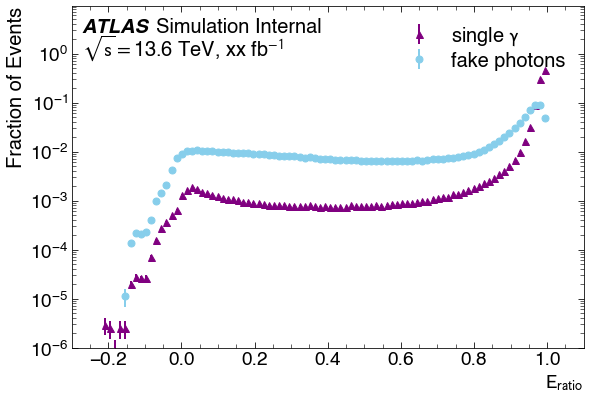

In [101]:
branchname = 'y_Eratio'
label = r'$E_{ratio}$'
minmax = (-.3,1.1)
hist1,hist2 = makebh(branchname,minmax)
ATLAShist(hist1,hist2,label,minmax,branchname)

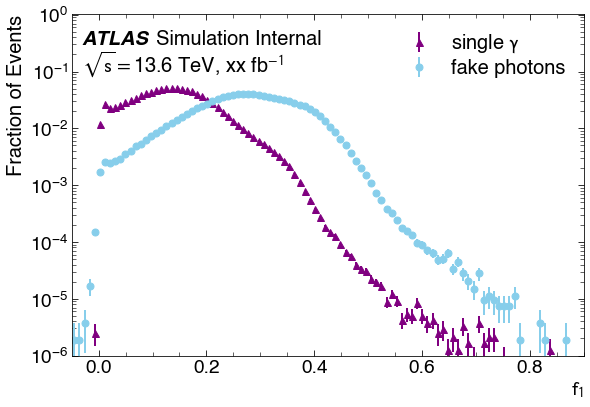

In [102]:
branchname = 'y_f1'
label = r'$f_1$'
minmax = (-.05,.9)
hist1,hist2 = makebh(branchname,minmax)
ATLAShist(hist1,hist2,label,minmax,branchname)